<a href="https://colab.research.google.com/github/akhila1107/64060_schinta7/blob/main/Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
from operator import itemgetter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
get_ipython().magic(u'matplotlib inline')
plt.style.use('ggplot')

import tensorflow as tf

from keras import models, regularizers, layers, optimizers, losses, metrics
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

In [2]:
from keras.layers import Embedding

# The Embedding layer takes at least two arguments:
# The number of possible tokens, here 1000 (1 + maximum word index),
# and the dimensionality of the embeddings, here 64.
emb_layer = Embedding(1000, 64)
from keras.datasets import imdb
from keras import preprocessing
from keras.utils import pad_sequences

# Number of words to consider as features
max_fea = 10000
# After this amount of words, cut the texts
#(among top max_features most common words)
maxlen = 150

# Data should be loaded as lists of integers
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_fea)

x_tr = x_train[:100]
y_tr = y_train[:100]

# This turns our lists of integers into a 2D integer tensor of shape
#`(samples, maxlen)`
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)
from keras.models import Sequential
from keras.layers import Flatten, Dense

model = Sequential()
# We provide our Embedding layer a maximum input length specification
# in order to flatten the embedded inputs later
model.add(Embedding(10000, 8, input_length=maxlen))
# After the Embedding layer, our activations have shape `(samples, maxlen, 8)`.

# We flatten the 3D tensor of embeddings into a 2D tensor of shape
#`(samples, maxlen * 8)`
model.add(Flatten())

# We add the classifier on top
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

17464789/17464789 [==============================] - 2s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 150, 8)            80000     
                                                                 
 flatten (Flatten)           (None, 1200)              0         
                                                                 
 dense (Dense)               (None, 1)                 1201      
                                                                 
Total params: 81201 (317.19 KB)
Trainable params: 81201 (317.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
625/625 [==============================] - 24s 35ms/step - loss: 0.6010 - acc: 0.6896 - val_loss: 0.4249 - val_acc: 0.8326
Epoch 2/10
625/625 [==============================] - 5s 7ms/step - loss: 0.3317 - 

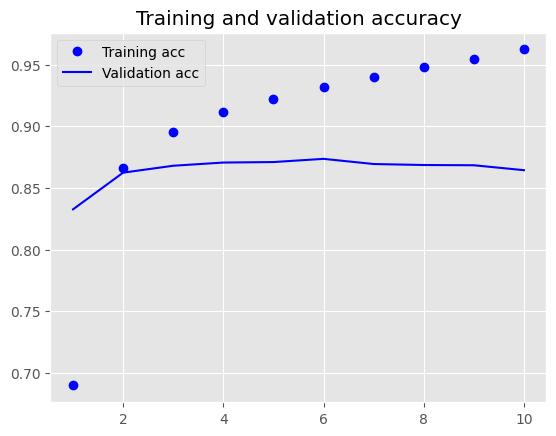

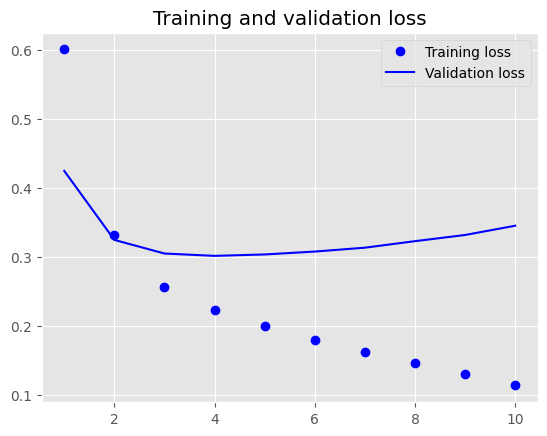

In [3]:
import matplotlib.pyplot as plt

# Training accuracy
acc = history.history["acc"]
# Validation accuracy
val_acc = history.history["val_acc"]
# Training loss
loss = history.history["loss"]
# Validation loss
val_loss = history.history["val_loss"]

#plots every epoch, here 10
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, "bo", label = "Training acc") # "bo" gives dot plot
plt.plot(epochs, val_acc, "b", label = "Validation acc") # "b" gives line plot
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, "bo", label = "Training loss")
plt.plot(epochs, val_loss, "b", label = "Validation loss")
plt.title("Training and validation loss")
plt.legend()

plt.show()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 150, 8)            80000     
                                                                 
 flatten_1 (Flatten)         (None, 1200)              0         
                                                                 
 dense_1 (Dense)             (None, 1)                 1201      
                                                                 
Total params: 81201 (317.19 KB)
Trainable params: 81201 (317.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
625/625 [==============================] - 14s 22ms/step - loss: 0.6091 - acc: 0.6892 - val_loss: 0.4361 - val_acc: 0.8262
Epoch 2/10
625/625 [==============================] - 3s 6ms/step - loss: 0.3381 - acc: 0.8668 - val_loss: 0.3211 - val_acc: 0.8658
Epoch 3/10
625

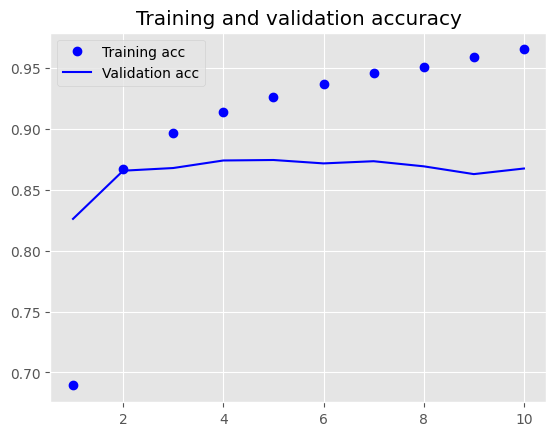

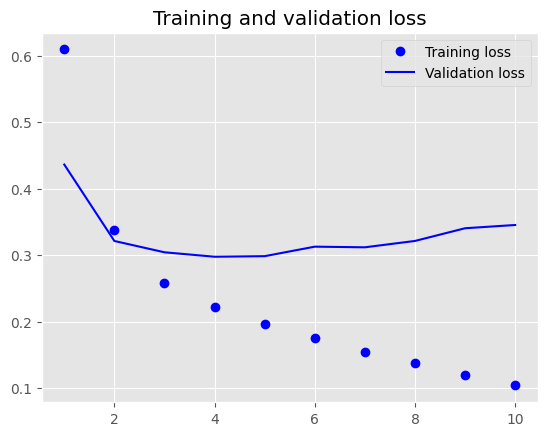

In [4]:
from keras.layers import Embedding

# The Embedding layer takes at least two arguments:
# the number of possible tokens, here 1000 (1 + maximum word index),
# and the dimensionality of the embeddings, here 64.
emb_layer = Embedding(1000, 64)
from keras.datasets import imdb
from keras import preprocessing

# Number of words to consider as features
max_fea = 10000
# After this amount of words, cut the texts
# (among top max_features most common words)
maxlen = 150

# Data should be loaded as lists of integers
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_fea)

x_tr = x_train[:500]
y_tr = y_train[:500]

# This turns our lists of integers
# into a 2D integer tensor of shape `(samples, maxlen)`
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)
from keras.models import Sequential
from keras.layers import Flatten, Dense
model = Sequential()
# We provide our Embedding layer a maximum input length specification
# in order to flatten the embedded inputs later
model.add(Embedding(10000, 8, input_length=maxlen))
# After the Embedding layer,
# our activations have shape `(samples, maxlen, 8)`.

# We flatten the 3D tensor of embeddings
# into a 2D tensor of shape `(samples, maxlen * 8)`
model.add(Flatten())

# We add the classifier on top
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)
acc = history.history["acc"] # Training accuracy
val_acc = history.history["val_acc"] # Validation accuracy
loss = history.history["loss"] # Training loss
val_loss = history.history["val_loss"] # Validation loss
epochs = range(1, len(acc) + 1) #plots every epoch, here 10

plt.plot(epochs, acc, "bo", label = "Training acc") # "bo" gives dot plot
plt.plot(epochs, val_acc, "b", label = "Validation acc") # "b" gives line plot
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, "bo", label = "Training loss")
plt.plot(epochs, val_loss, "b", label = "Validation loss")
plt.title("Training and validation loss")
plt.legend()

plt.show()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 150, 8)            80000     
                                                                 
 flatten_2 (Flatten)         (None, 1200)              0         
                                                                 
 dense_2 (Dense)             (None, 1)                 1201      
                                                                 
Total params: 81201 (317.19 KB)
Trainable params: 81201 (317.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
625/625 [==============================] - 15s 23ms/step - loss: 0.6080 - acc: 0.6848 - val_loss: 0.4354 - val_acc: 0.8222
Epoch 2/10
625/625 [==============================] - 3s 5ms/step - loss: 0.3375 - acc: 0.8646 - val_loss: 0.3259 - val_acc: 0.8630
Epoch 3/10
625

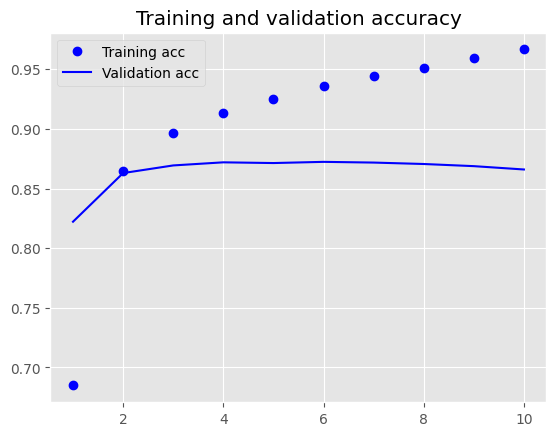

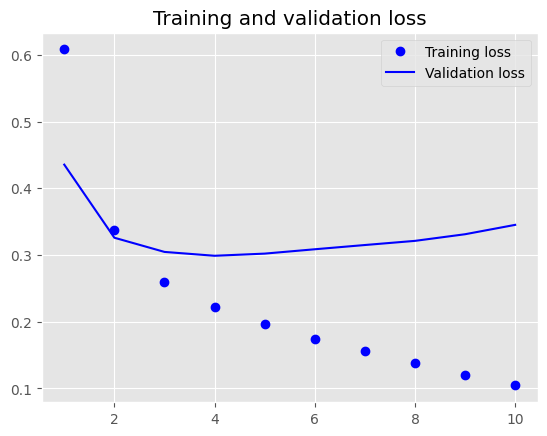

In [5]:
from keras.layers import Embedding

# The Embedding layer takes at least two arguments:
# the number of possible tokens, here 1000 (1 + maximum word index),
# and the dimensionality of the embeddings, here 64.
emb_layer = Embedding(1000, 64)
from keras.datasets import imdb
from keras import preprocessing

# Number of words to consider as features
max_fea = 10000
# After this amount of words, cut the texts
# (among top max_features most common words)
maxlen = 150

# Data should be loaded as lists of integers
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_fea)

x_tr = x_train[:1000]
y_tr = y_train[:1000]

# This turns our lists of integers
# into a 2D integer tensor of shape `(samples, maxlen)`
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)
from keras.models import Sequential
from keras.layers import Flatten, Dense
model = Sequential()
# We provide our Embedding layer a maximum input length specification
# in order to flatten the embedded inputs later
model.add(Embedding(10000, 8, input_length=maxlen))
# After the Embedding layer,
# our activations have shape `(samples, maxlen, 8)`.

# We flatten the 3D tensor of embeddings
# into a 2D tensor of shape `(samples, maxlen * 8)`
model.add(Flatten())

# We add the classifier on top
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)
acc = history.history["acc"] # Training accuracy
val_acc = history.history["val_acc"] # Validation accuracy
loss = history.history["loss"] # Training loss
val_loss = history.history["val_loss"] # Validation loss

epochs = range(1, len(acc) + 1) #plots every epoch, here 10

plt.plot(epochs, acc, "bo", label = "Training acc") # "bo" gives dot plot
plt.plot(epochs, val_acc, "b", label = "Validation acc") # "b" gives line plot
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, "bo", label = "Training loss")
plt.plot(epochs, val_loss, "b", label = "Validation loss")
plt.title("Training and validation loss")
plt.legend()

plt.show()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 150, 8)            80000     
                                                                 
 flatten_3 (Flatten)         (None, 1200)              0         
                                                                 
 dense_3 (Dense)             (None, 1)                 1201      
                                                                 
Total params: 81201 (317.19 KB)
Trainable params: 81201 (317.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
625/625 [==============================] - 14s 22ms/step - loss: 0.5947 - acc: 0.7057 - val_loss: 0.4270 - val_acc: 0.8312
Epoch 2/10
625/625 [==============================] - 4s 6ms/step - loss: 0.3356 - acc: 0.8669 - val_loss: 0.3269 - val_acc: 0.8584
Epoch 3/10
625

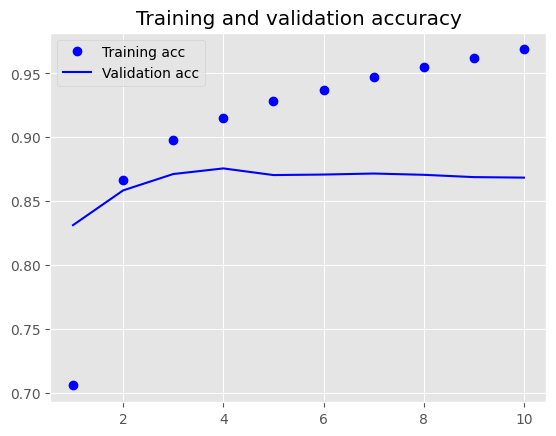

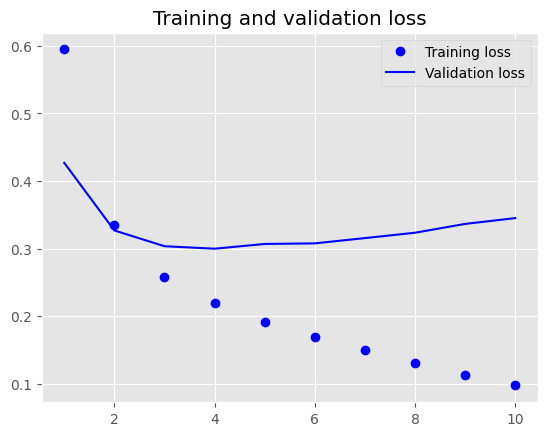

In [6]:
from keras.layers import Embedding

# The Embedding layer takes at least two arguments:
# the number of possible tokens, here 1000 (1 + maximum word index),
# and the dimensionality of the embeddings, here 64.
emb_layer = Embedding(1000, 64)
from keras.datasets import imdb
from keras import preprocessing

# Number of words to consider as features
max_fea = 10000
# After this amount of words, cut the texts
# (among top max_features most common words)
maxlen = 150

# Data should be loaded as lists of integers
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_fea)

x_tr = x_train[:10000]
y_tr = y_train[:10000]

# This turns our lists of integers
# into a 2D integer tensor of shape `(samples, maxlen)`
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)
from keras.models import Sequential
from keras.layers import Flatten, Dense
model = Sequential()
# We provide our Embedding layer a maximum input length specification
# in order to flatten the embedded inputs later
model.add(Embedding(10000, 8, input_length=maxlen))
# After the Embedding layer,
# our activations have shape `(samples, maxlen, 8)`.

# We flatten the 3D tensor of embeddings
# into a 2D tensor of shape `(samples, maxlen * 8)`
model.add(Flatten())

# We add the classifier on top
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)
acc = history.history["acc"] # Training accuracy
val_acc = history.history["val_acc"] # Validation accuracy
loss = history.history["loss"] # Training loss
val_loss = history.history["val_loss"] # Validation loss

epochs = range(1, len(acc) + 1) #plots every epoch, here 10
plt.plot(epochs, acc, "bo", label = "Training acc") # "bo" gives dot plot
plt.plot(epochs, val_acc, "b", label = "Validation acc") # "b" gives line plot
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, "bo", label = "Training loss")
plt.plot(epochs, val_loss, "b", label = "Validation loss")
plt.title("Training and validation loss")
plt.legend()

plt.show()

In [7]:
!curl -O https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
!tar -xf aclImdb_v1.tar.gz
!rm -r aclImdb/train/unsup

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 80.2M  100 80.2M    0     0  5935k      0  0:00:13  0:00:13 --:--:-- 13.8M


In [8]:
import os
import shutil

im_dir = 'aclImdb'
tr_dir = os.path.join(im_dir, 'train')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(tr_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname), encoding='utf-8')
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

In the event that there is insufficient training data to acquire word embeddings in tandem with the desired solution, pretrained word embeddings may be utilized.

Each training review is gathered into a list of strings, one string for each review, and the labels (positive/negative) associated with each review are gathered into a list of labels.

**Data tokenization**

In [9]:
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
import numpy as np

maxlen = 150 # cuts off review after 150 words
tr_samples = 100 # Trains on 100 samples
val_samples = 10000 # Validates 10000 samples
max_words = 10000 # Considers only the top 10000 words in the dataset

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
word_index = tokenizer.word_index    # Length: 88582
print("Found %s unique tokens." % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)

labels = np.asarray(labels)
print("Shape of data tensor:", data.shape)
print("Shape of label tensor:", labels.shape)

indices = np.arange(data.shape[0]) # Splits data into training and validation set, but shuffles is, since samples are ordered:
# all negatives first, then all positive
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_tr = data[:tr_samples] # (200, 100)
y_tr = labels[:tr_samples] # shape (200,)
x_val = data[tr_samples:tr_samples+val_samples] # shape (10000, 100)
y_val = labels[tr_samples:tr_samples+val_samples] # shape (10000,)

Found 88582 unique tokens.
Shape of data tensor: (25000, 150)
Shape of label tensor: (25000,)


GloVe word embedding download and preprocessing

In [10]:
import numpy as np
import requests
from io import BytesIO
import zipfile  # importing zipfile module

glove_url = 'https://nlp.stanford.edu/data/glove.6B.zip'  # URL to download GloVe embeddings
glove_zip = requests.get(glove_url)

# Unzip the contents
with zipfile.ZipFile(BytesIO(glove_zip.content)) as z:
    z.extractall('/content/glove')

# Loading GloVe embeddings into memory
embeddings_index = {}
with open('/content/glove/glove.6B.100d.txt', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

print("Found %s word vectors." % len(embeddings_index))

Found 400000 word vectors.


Subsequently, an embedding matrix that fits inside an embedding layer is needed. The matrix must be in the form of a 10000 x 100 matrix with the dimensions (max words, embedding dim). GloVe measures 100 by 400000.

Setting up the matrix of GloVe word embeddings

In [11]:
emb_dim = 100

emb_matrix = np.zeros((max_words, emb_dim))
for word, i in word_index.items():
    emb_vector = embeddings_index.get(word)
    if i < max_words:
        if emb_vector is not None:
            # Words not found in embedding index will be all-zeros.
            emb_matrix[i] = emb_vector

In [12]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, emb_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 150, 100)          1000000   
                                                                 
 flatten_4 (Flatten)         (None, 15000)             0         
                                                                 
 dense_4 (Dense)             (None, 32)                480032    
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1480065 (5.65 MB)
Trainable params: 1480065 (5.65 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
model.layers[0].set_weights([emb_matrix])
model.layers[0].trainable = False

Adding pretrained word embedding to the Embeddig layer We can make sure that when you call the Embedding layer, it is not trainable by setting this to False. If you set trainable = True, the optimization algorithm will be able to change the word embedding values. In order to keep pretrained sections from forgetting what they already "know," it is preferable to not update them while they are still practicing.

In [14]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))
model.save_weights('pre_trained_glove_model.h5')

Epoch 1/10
782/782 [==============================] - 4s 3ms/step - loss: 0.7033 - acc: 0.5086 - val_loss: 0.6923 - val_acc: 0.5110
Epoch 2/10
782/782 [==============================] - 3s 3ms/step - loss: 0.6904 - acc: 0.5239 - val_loss: 0.6923 - val_acc: 0.5127
Epoch 3/10
782/782 [==============================] - 2s 3ms/step - loss: 0.6775 - acc: 0.5598 - val_loss: 0.7076 - val_acc: 0.5241
Epoch 4/10
782/782 [==============================] - 2s 3ms/step - loss: 0.6537 - acc: 0.6084 - val_loss: 0.7292 - val_acc: 0.5214
Epoch 5/10
782/782 [==============================] - 3s 3ms/step - loss: 0.6219 - acc: 0.6448 - val_loss: 0.8129 - val_acc: 0.5092
Epoch 6/10
782/782 [==============================] - 2s 3ms/step - loss: 0.5905 - acc: 0.6788 - val_loss: 0.7810 - val_acc: 0.5063
Epoch 7/10
782/782 [==============================] - 2s 3ms/step - loss: 0.5651 - acc: 0.7036 - val_loss: 0.7828 - val_acc: 0.5048
Epoch 8/10
782/782 [==============================] - 3s 3ms/step - loss: 0.

It is clear that the model overfits rather quickly, which was to be expected given the small number of training examples. It is this same cause that accounts for the large variation in validation accuracy.

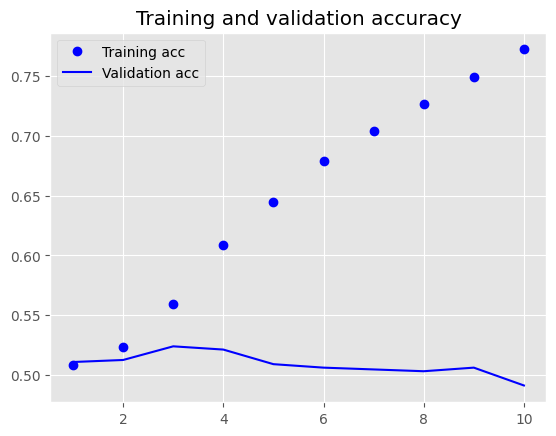

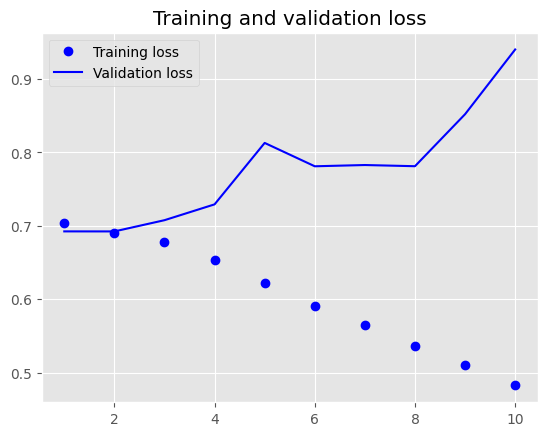

In [15]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Found 88582 unique tokens.
Shape of data tensor: (25000, 150)
Shape of label tensor: (25000,)
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 150, 100)          1000000   
                                                                 
 flatten_5 (Flatten)         (None, 15000)             0         
                                                                 
 dense_6 (Dense)             (None, 32)                480032    
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1480065 (5.65 MB)
Trainable params: 1480065 (5.65 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
782/782 [==============================] - 

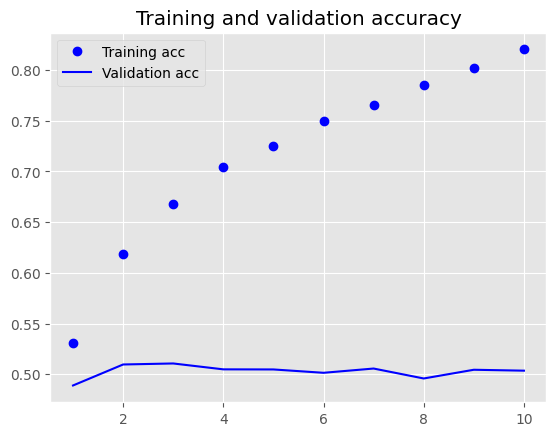

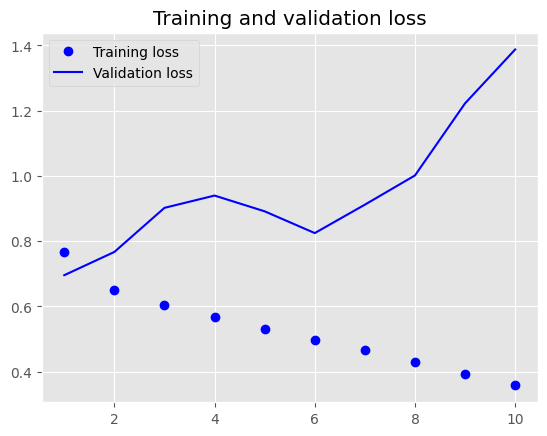

In [16]:
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
import numpy as np

maxlen = 150 # cuts off review after 150 words
tr_samples = 500 # Trains on 500 samples
val_samples = 10000 # Validates 10000 samples
max_words = 10000 # Considers only the top 10000 words in the dataset

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
word_index = tokenizer.word_index    # Length: 88582
print("Found %s unique tokens." % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)

labels = np.asarray(labels)
print("Shape of data tensor:", data.shape)
print("Shape of label tensor:", labels.shape)

indices = np.arange(data.shape[0]) # splits data into training and validation sets,
# however since the samples are arranged, it shuffles the data: all negatives first, then all positive
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]
x_tr = data[:tr_samples] # (200, 100)
y_tr = labels[:tr_samples] # shape (200,)
x_val = data[tr_samples:tr_samples+val_samples] # shape (10000, 100)
y_val = labels[tr_samples:tr_samples+val_samples] # shape (10000,)
emb_dim = 100

emb_matrix = np.zeros((max_words, emb_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            emb_matrix[i] = embedding_vector

from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, emb_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()
model.layers[0].set_weights([emb_matrix])
model.layers[0].trainable = False
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))
model.save_weights('pre_trained_glove_model.h5')
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Found 88582 unique tokens.
Shape of data tensor: (25000, 150)
Shape of label tensor: (25000,)
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, 150, 100)          1000000   
                                                                 
 flatten_6 (Flatten)         (None, 15000)             0         
                                                                 
 dense_8 (Dense)             (None, 32)                480032    
                                                                 
 dense_9 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1480065 (5.65 MB)
Trainable params: 1480065 (5.65 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
782/782 [==============================] - 

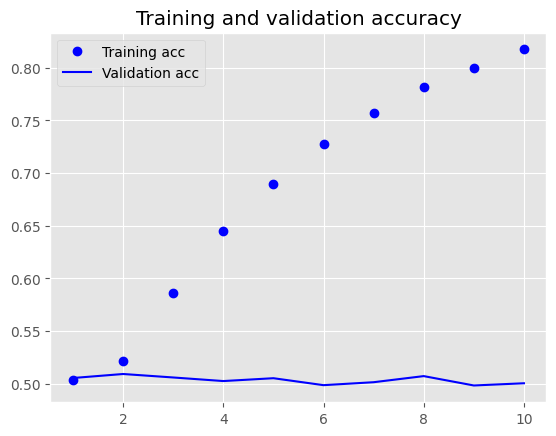

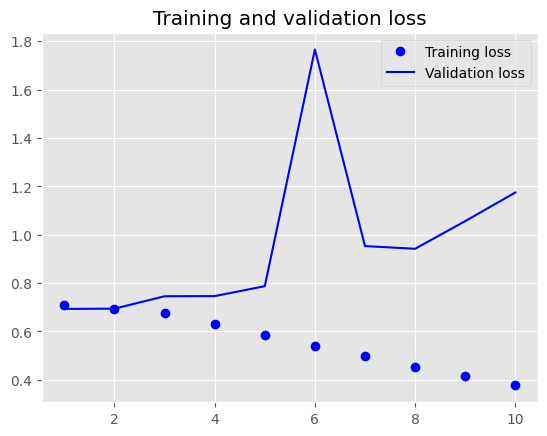

In [17]:
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
import numpy as np

maxlen = 150 # cuts off review after 150 words
tr_samples = 1000 #Trains on 1000 samples
val_samples = 10000 # Validates o 10000 samples
max_words = 10000 # Considers only the top 10000 words in the dataset

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
word_index = tokenizer.word_index      # Length: 88582
print("Found %s unique tokens." % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)

labels = np.asarray(labels)
print("Shape of data tensor:", data.shape)
print("Shape of label tensor:", labels.shape)

indices = np.arange(data.shape[0]) # splits data into training and validation sets,
# however since the samples are arranged, it shuffles the data: all negatives first, then all positive
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_tr = data[:tr_samples] # (200, 100)
y_tr = labels[:tr_samples] # shape (200,)
x_val = data[tr_samples:tr_samples+val_samples] # shape (10000, 100)
y_val = labels[tr_samples:tr_samples+val_samples] # shape (10000,)
emb_dim = 100
emb_matrix = np.zeros((max_words, emb_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            emb_matrix[i] = embedding_vector

from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, emb_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.layers[0].set_weights([emb_matrix])
model.layers[0].trainable = False
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))
model.save_weights('pre_trained_glove_model.h5')
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Found 88582 unique tokens.
Shape of data tensor: (25000, 150)
Shape of label tensor: (25000,)
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_11 (Embedding)    (None, 150, 100)          1000000   
                                                                 
 flatten_7 (Flatten)         (None, 15000)             0         
                                                                 
 dense_10 (Dense)            (None, 32)                480032    
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 1480065 (5.65 MB)
Trainable params: 1480065 (5.65 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
782/782 [==============================] - 

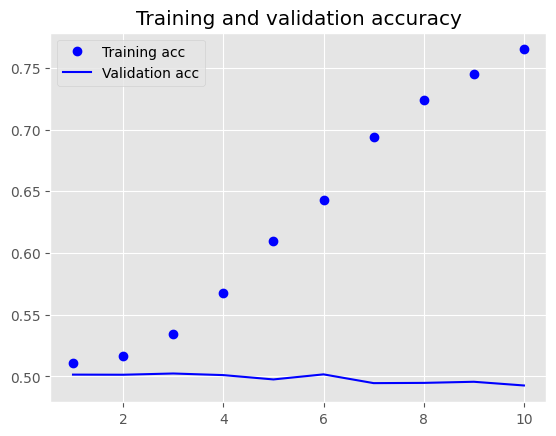

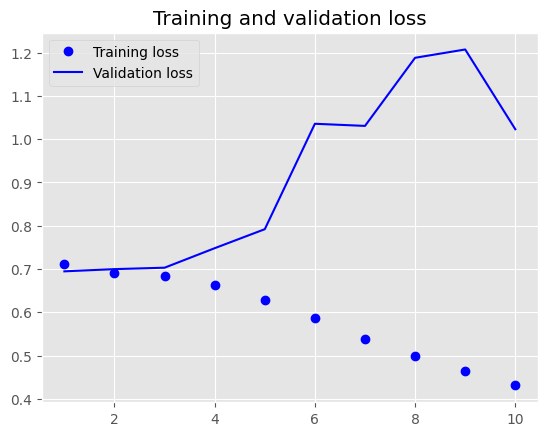

In [18]:

from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
import numpy as np

maxlen = 150 # cuts off review after 150 words
tr_samples = 10000 # Trains on 10000 samples
val_samples = 10000 # Validates o 10000 samples
max_words = 10000 # Considers only the top 10000 words in the dataset

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
word_index = tokenizer.word_index       # Length: 88582
print("Found %s unique tokens." % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)

labels = np.asarray(labels)
print("Shape of data tensor:", data.shape)
print("Shape of label tensor:", labels.shape)

indices = np.arange(data.shape[0]) # splits data into training and validation sets,
# however since the samples are arranged, it shuffles the data: all negatives first, then all positive
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_tr = data[:tr_samples] # (200, 100)
y_tr = labels[:tr_samples] # shape (200,)
x_val = data[tr_samples:tr_samples+val_samples] # shape (10000, 100)
y_val = labels[tr_samples:tr_samples+val_samples] # shape (10000,)
emb_dim = 100
emb_matrix = np.zeros((max_words, emb_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            emb_matrix[i] = embedding_vector

from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, emb_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()
model.layers[0].set_weights([emb_matrix])
model.layers[0].trainable = False
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))
model.save_weights('pre_trained_glove_model.h5')
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()